In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
# ntuple = "/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_600/ntuple.root"
# model = "/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/weaver-multiH/weaver/models/exp_xy/XY_3H_reco_ranker/20230220_ranger_lr0.0047_batch1024__withbkg/"

In [4]:
module = fc.eightb.preselection.t8btag_minmass
model = eightb.models.yy_quadh_bkg10_allsig

In [5]:
altfile='yy_quadh_bkg10_soft025_md_allsig_{base}'
signal = ObjIter([Tree(f, altfile=altfile) for f in module.signal_list])
qcd = ObjIter([Tree(module.Run2_UL18.QCD_B_List, altfile=altfile)])

100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


100%|██████████| 2/2 [00:00<00:00,  5.48it/s]


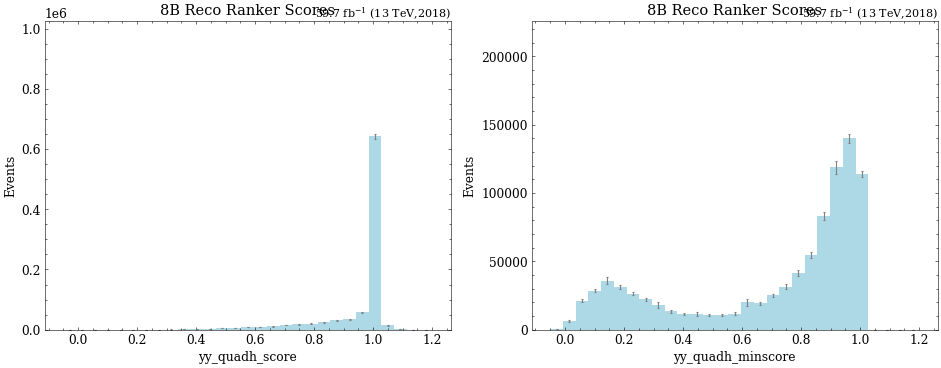

In [7]:
study.quick(
    qcd,
    title='8B Reco Ranker Scores',
    varlist=['yy_quadh_score','yy_quadh_minscore'],
    # xlabel=['maximum reco score','minimum reco score'],
    binlist=[(-0.05,1.2,30)]*2,

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


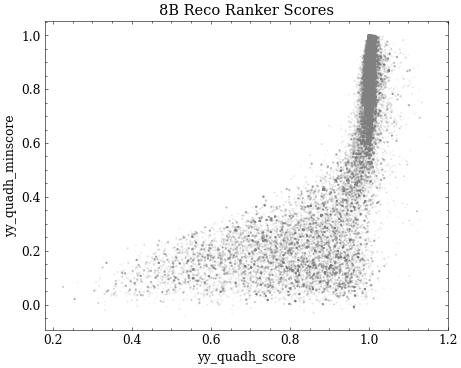

In [6]:
study.quick2d(
    qcd,
    title='8B Reco Ranker Scores',
    varlist=['yy_quadh_score','yy_quadh_minscore'],
    # xlabel=['maximum reco score','minimum reco score'],
    binlist=[(-0.05,1.2,30)]*2,
    scatter=dict(fraction=100000, alpha=0.05, size=1),
)

In [7]:
from utils.sixbUtils.weaver import load_sixb_weaver, load_yh_trih_ranker

In [8]:
def fix_qcd_signalId(t):
    jet_signalId = ak.ones_like(t.jet_pt) * (-1)
    t.extend(jet_signalId=jet_signalId)
qcd.apply(fix_qcd_signalId)

[None]

In [10]:
(signal+qcd).apply(lambda tree : load_yh_trih_ranker(tree, model), report=True)

100%|██████████| 2/2 [00:08<00:00,  4.25s/it]


[None, None]

100%|██████████| 1/1 [00:05<00:00,  5.24s/it]


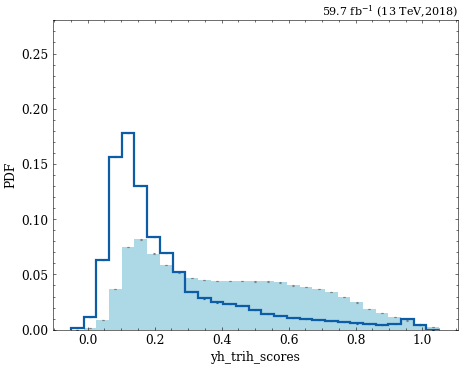

In [15]:
study.quick(
    signal+qcd,
    varlist=["yh_trih_scores"],
    binlist=[(-0.05,1.05,30)]*2,
    efficiency=True,
)

100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


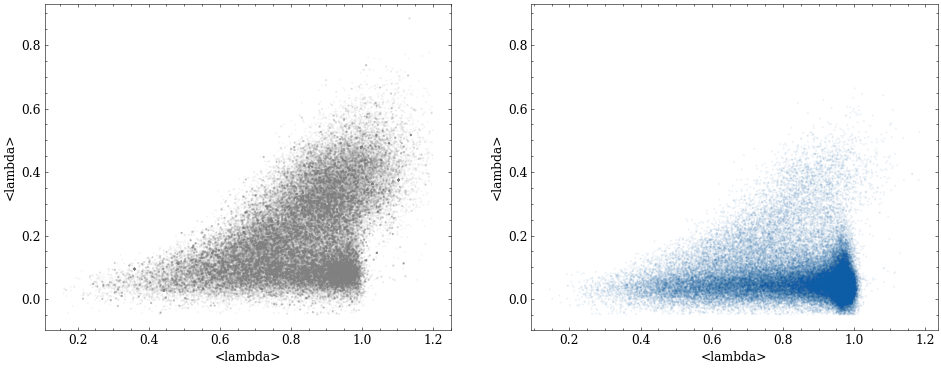

In [34]:
study.quick2d(
    signal+qcd,
    varlist=[lambda t:ak.max(t.yh_trih_scores,axis=1),lambda t:ak.min(t.yh_trih_scores,axis=1)],
    # xlabel=['maximum reco score','minimum reco score'],
    binlist=[(-0.05,1.2,30)]*2,
    scatter=dict(fraction=100000, alpha=0.05, size=1),
)

100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


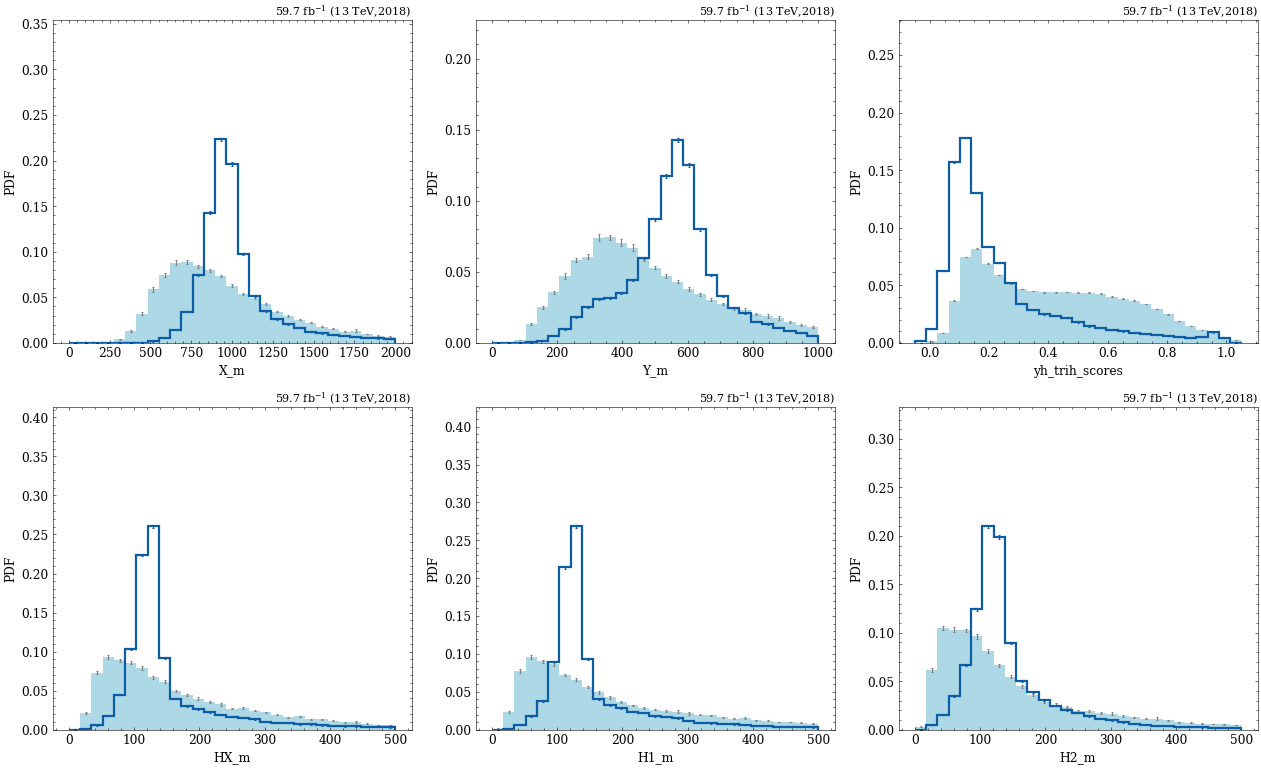

In [16]:
study.quick(
    signal+qcd,
    # masks=lambda t : np.abs(t.HX_m-125) < 50, 
    efficiency=True,
    varlist=['X_m','Y_m','yh_trih_scores','HX_m','H1_m','H2_m'],
    xlabels=['X_m','Y_m',None,'HX_m','H1_m','H2_m'],
    binlist=[(0,2000,30),(0,1000,30),(-0.05,1.05,30)]+[(0,500,30)]*3,
    dim=(-1,3),
)

100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


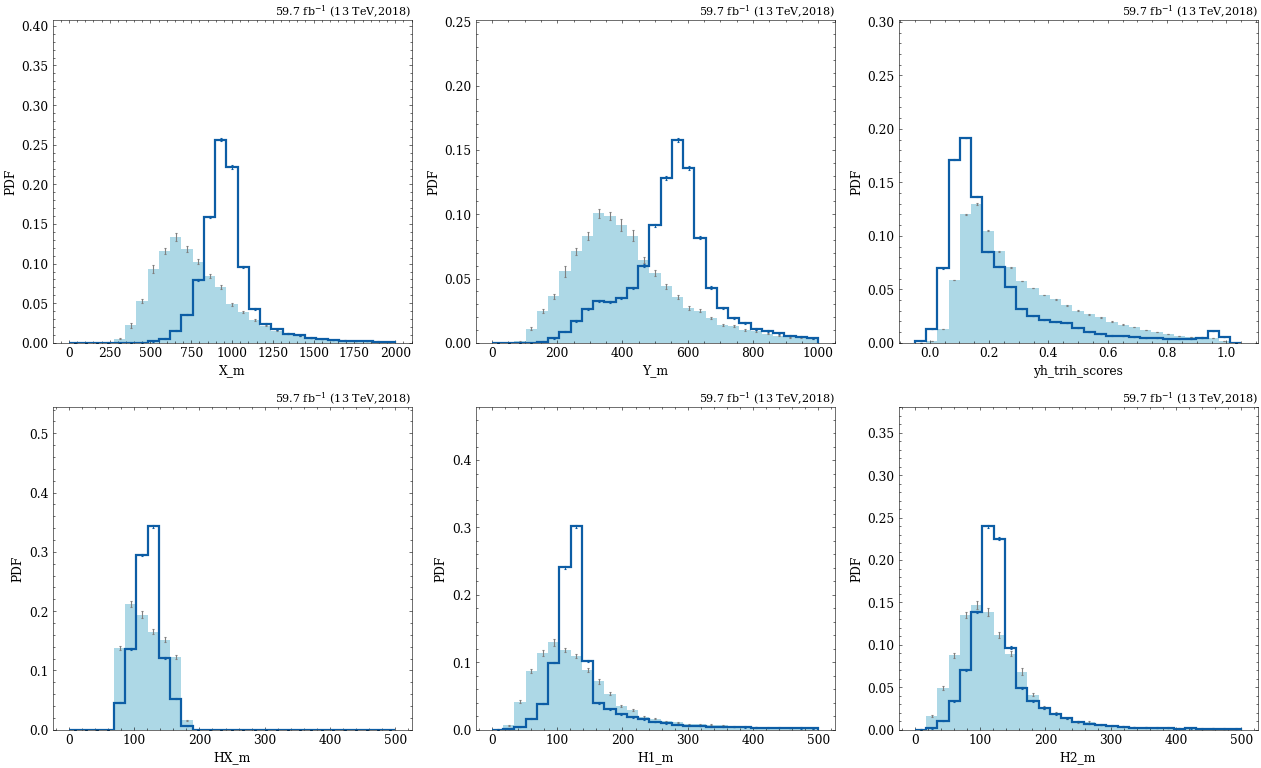

In [17]:
study.quick(
    signal+qcd,
    masks=lambda t : np.abs(t.HX_m-125) < 50, 
    efficiency=True,
    varlist=['X_m','Y_m','yh_trih_scores','HX_m','H1_m','H2_m'],
    xlabels=['X_m','Y_m',None,'HX_m','H1_m','H2_m'],
    binlist=[(0,2000,30),(0,1000,30),(-0.05,1.05,30)]+[(0,500,30)]*3,
    dim=(-1,3),
)

100%|██████████| 6/6 [00:02<00:00,  2.49it/s]


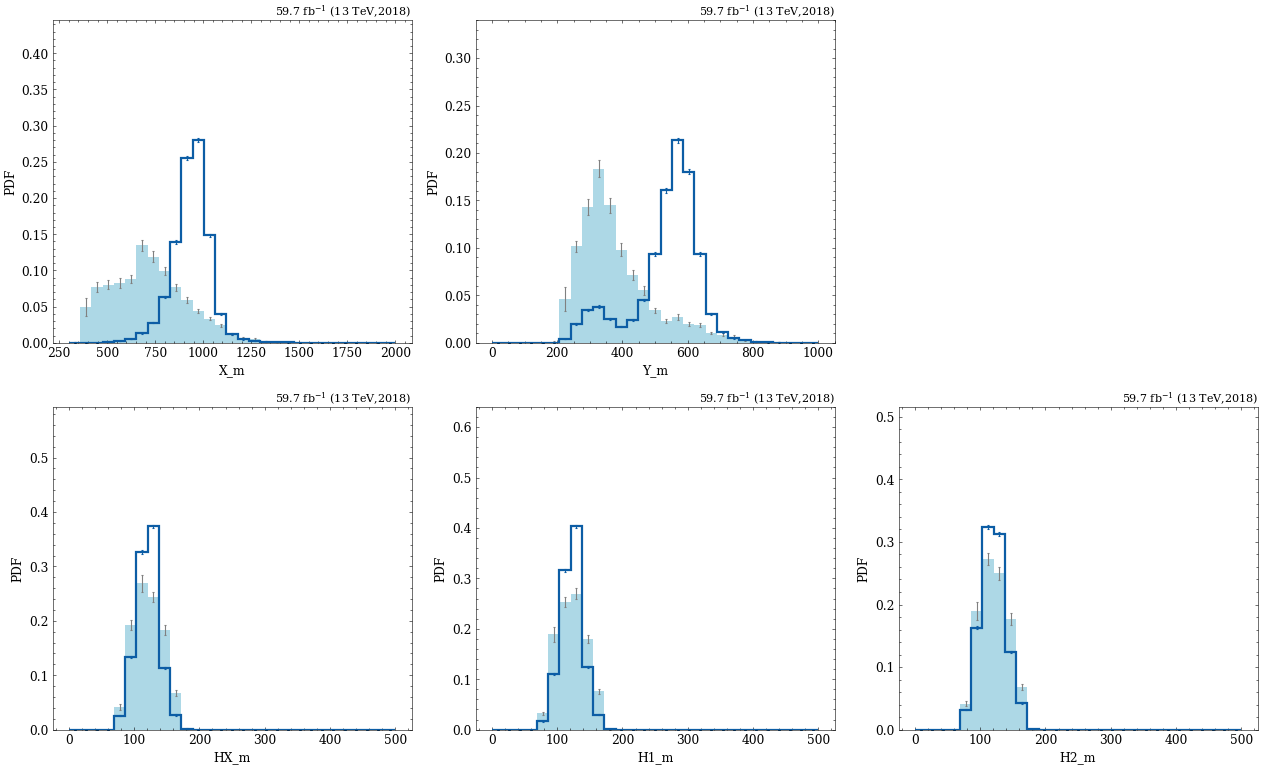

In [68]:
study.quick(
    signal+qcd,
    masks=lambda t : np.abs(t.HX_m-125) < 50, 
    efficiency=True,
    varlist=['X_m','Y_m','yh_trih_scores','HX_m','H1_m','H2_m'],
    xlabels=['X_m','Y_m',None,'HX_m','H1_m','H2_m'],
    binlist=[(0,2000,30),(0,1000,30),(-0.05,1.05,30)]+[(0,500,30)]*3,
    dim=(-1,3),
)

100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


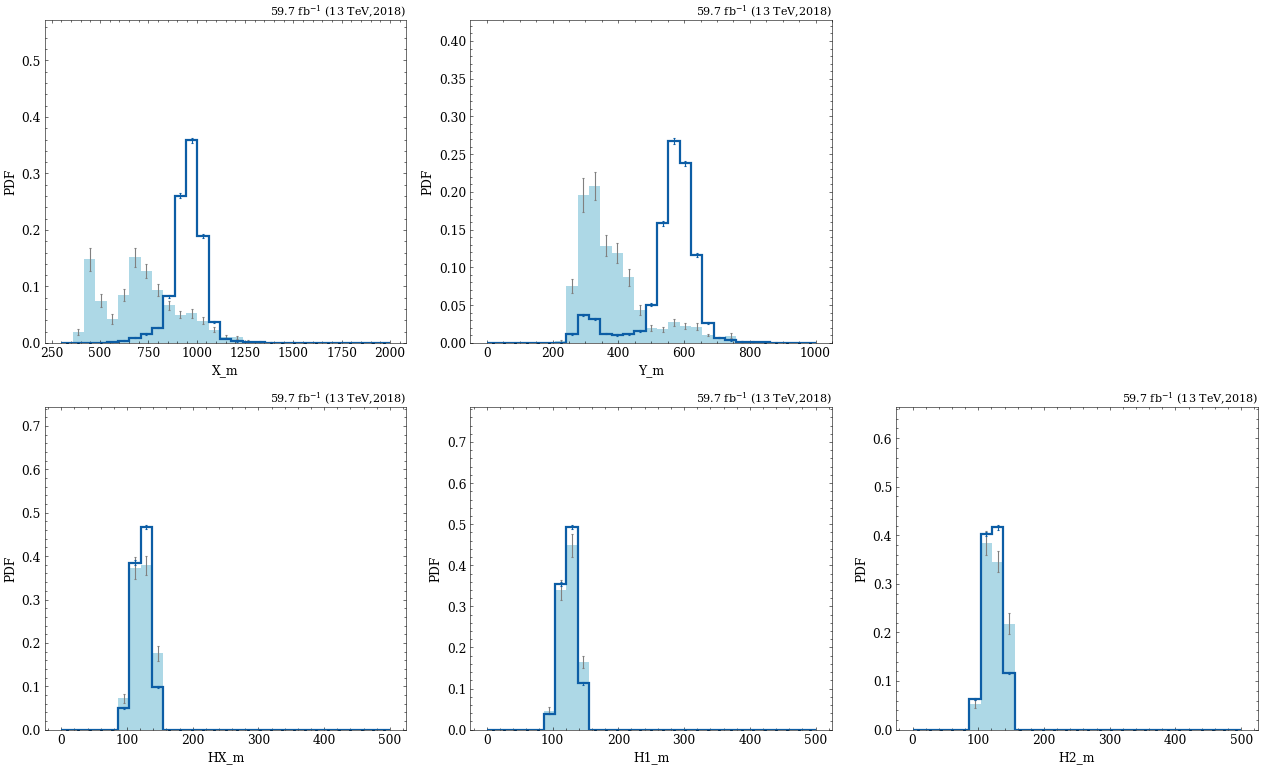

In [69]:
study.quick(
    signal+qcd,
    masks=lambda t : np.sqrt(ak.sum( (t.higgs_m-125)**2, axis=1 )) < 30, 
    efficiency=True,
    varlist=['X_m','Y_m',None,'HX_m','H1_m','H2_m'],
    xlabels=['X_m','Y_m',None,'HX_m','H1_m','H2_m'],
    binlist=[(300,2000,30),(0,1000,30),None]+[(0,500,30)]*3,
    dim=(-1,3),
)

100%|██████████| 1/1 [00:06<00:00,  6.12s/it]


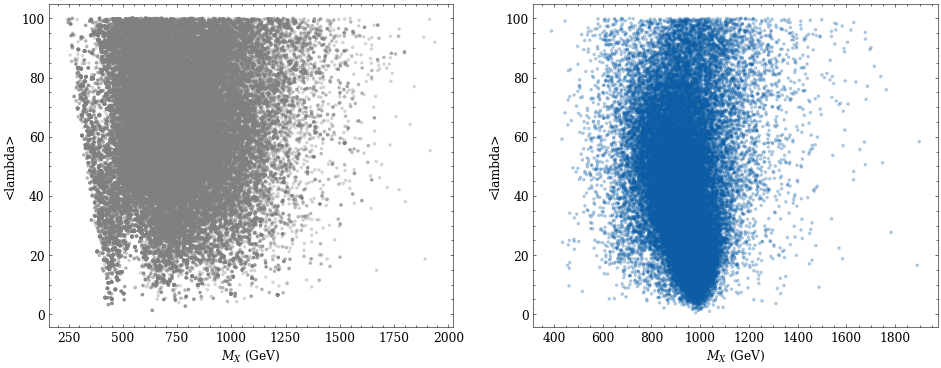

In [74]:
study.quick2d(
    signal+qcd,
    # efficiency=True,
    xvarlist=['X_m'],
    yvarlist=[lambda t : np.sqrt(ak.sum( (t.higgs_m-125)**2, axis=1 ))],
    binlist=[(0,2000,30),(0,100,30)],
    scatter=dict(fraction=0.8),
)